In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import matplotlib
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn.metrics import mean_squared_error
from numpy import array

In [2]:
df = pd.read_excel('Talcher_data.xlsx')
df = df.drop(['To Date', 'Unnamed: 0'],axis = 1)
df.head()

,From Date,PM10,PM2.5,WS,WD,AT,RH
0,01-01-2018 00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-2018 00:15,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-2018 00:30,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-2018 00:45,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-2018 01:00,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

From Date     object
PM10         float64
PM2.5        float64
WS           float64
WD           float64
AT           float64
RH           float64
dtype: object

In [4]:
df.reset_index(inplace = True)
df = df.drop(['index'], axis = 1)
df['From Date'] = pd.to_datetime(df['From Date'])
df['From Date'] = pd.to_datetime(df['From Date'])


df.dtypes
df.head()

,From Date,PM10,PM2.5,WS,WD,AT,RH
0,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Set the date as Index
df = df.set_index(df['From Date'],drop = True)
df = df.sort_index()

#Take the mean of each day 
df = df.resample('d').mean()
df.head()
#Removing the outlier
df = df['2018-01':'2020-02']
df_ospcb = df.copy()

df_ospcb.head()

,PM10,PM2.5,WS,WD,AT,RH
From Date,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,379.369643,195.931398,2.707553,144.437128,27.276702,44.332021
2018-01-04,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118
2018-01-05,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810


In [6]:
date_series = df_ospcb.index
date_series

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-02-29'],
              dtype='datetime64[ns]', name='From Date', length=790, freq='D')

In [7]:
print(df_ospcb.columns)

Index(['PM10', 'PM2.5', 'WS', 'WD', 'AT', 'RH'], dtype='object')


In [8]:
from sklearn.impute import KNNImputer

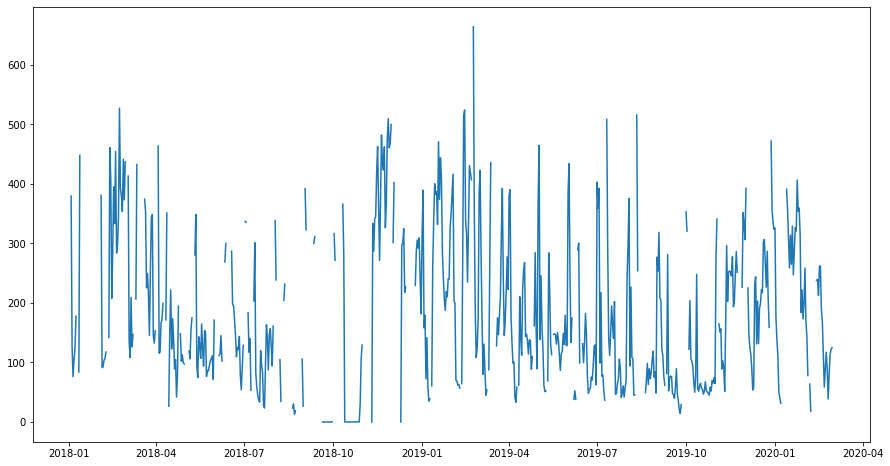

In [9]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,8

plt.plot(df_ospcb['PM10'])

In [10]:
imputer = KNNImputer(n_neighbors=200, weights='distance')
df_ospcb_imputed_knn = imputer.fit_transform(df_ospcb)

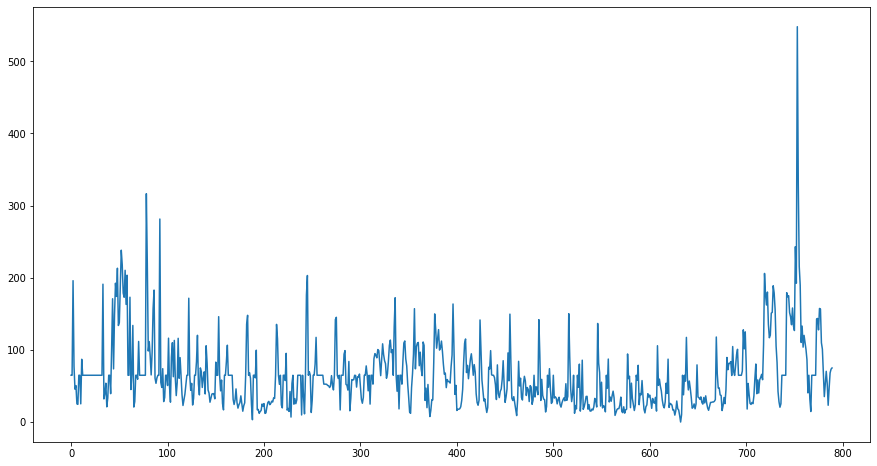

In [11]:
plt.plot(df_ospcb_imputed_knn[:, 1])

In [12]:
df_ospcb_after_impute = pd.DataFrame(data = df_ospcb_imputed_knn, columns = df_ospcb.columns)
df_ospcb_after_impute.head()

,PM10,PM2.5,WS,WD,AT,RH
0,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709
1,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709
2,379.369643,195.931398,2.707553,144.437128,27.276702,44.332021
3,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118
4,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810


In [13]:
df_ospcb_after_impute['Date'] = date_series
df_ospcb_after_impute.head()

,PM10,PM2.5,WS,WD,AT,RH,Date
0,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709,2018-01-01
1,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709,2018-01-02
2,379.369643,195.931398,2.707553,144.437128,27.276702,44.332021,2018-01-03
3,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118,2018-01-04
4,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810,2018-01-05


In [14]:
#Set the date as Index
df_ospcb_after_impute = df_ospcb_after_impute.set_index(df_ospcb_after_impute['Date'], drop = True)
df_ospcb_after_impute = df_ospcb_after_impute.sort_index()
df_ospcb_after_impute.head()

,PM10,PM2.5,WS,WD,AT,RH,Date
Date,,,,,,,
2018-01-01,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709,2018-01-01
2018-01-02,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709,2018-01-02
2018-01-03,379.369643,195.931398,2.707553,144.437128,27.276702,44.332021,2018-01-03
2018-01-04,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118,2018-01-04
2018-01-05,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810,2018-01-05


In [15]:
df_ospcb_after_impute = df_ospcb_after_impute.drop(['Date'], axis = 1)
df_ospcb_after_impute.head()

,PM10,PM2.5,WS,WD,AT,RH
Date,,,,,,
2018-01-01,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709
2018-01-02,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709
2018-01-03,379.369643,195.931398,2.707553,144.437128,27.276702,44.332021
2018-01-04,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118
2018-01-05,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810


In [16]:
df_index_list = df_ospcb_after_impute.index.values
years = pd.DatetimeIndex(df_index_list)
list_year = years.year
list_month = years.month
list_day = years.day
list_dayOfWeek = years.dayofweek
df_ospcb_after_impute['year'] = list_year 
df_ospcb_after_impute['month'] = list_month 
df_ospcb_after_impute['day'] = list_day
df_ospcb_after_impute['day_of_week'] = list_dayOfWeek

#Determining Weekend
def weekend(row):
   if (row == 5) or (row == 6):
       return 1
   else:
       return 0

df_ospcb_after_impute['weekend'] = df_ospcb_after_impute['day_of_week'].apply(weekend)
df_ospcb_after_impute.head()

,PM10,PM2.5,WS,WD,AT,RH,year,month,day,day_of_week,weekend
Date,,,,,,,,,,,
2018-01-01,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709,2018,1,1,0,0
2018-01-02,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709,2018,1,2,1,0
2018-01-03,379.369643,195.931398,2.707553,144.437128,27.276702,44.332021,2018,1,3,2,0
2018-01-04,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118,2018,1,4,3,0
2018-01-05,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810,2018,1,5,4,0


In [17]:
corr_mat = df_ospcb_after_impute.corr(method = 'pearson')
print(corr_mat)

                 PM10     PM2.5        WS  ...       day  day_of_week   weekend
PM10         1.000000  0.707946  0.273760  ... -0.090195    -0.025421 -0.016697
PM2.5        0.707946  1.000000  0.418346  ... -0.008796    -0.019309 -0.008618
WS           0.273760  0.418346  1.000000  ... -0.009424    -0.009018 -0.016121
WD          -0.403498 -0.362115 -0.201163  ... -0.012144     0.003737 -0.001907
AT          -0.149077 -0.205934 -0.041354  ...  0.045218    -0.003135 -0.005662
RH          -0.450336 -0.428953 -0.040995  ...  0.055451    -0.001623 -0.020340
year         0.005235  0.034271  0.318696  ... -0.003916     0.003902 -0.000598
month       -0.122000 -0.161136 -0.069601  ...  0.012298     0.003619  0.009268
day         -0.090195 -0.008796 -0.009424  ...  1.000000    -0.003235 -0.009140
day_of_week -0.025421 -0.019309 -0.009018  ... -0.003235     1.000000  0.789942
weekend     -0.016697 -0.008618 -0.016121  ... -0.009140     0.789942  1.000000

[11 rows x 11 columns]


In [18]:
corr_mat.to_excel("correlation_matrix.xlsx")

In [19]:
mean_ospcb = df_ospcb_after_impute['PM10'].min()
std_dev_ospcb = df_ospcb_after_impute['PM10'].max() - df_ospcb_after_impute['PM10'].min()

cols = ['PM10','PM2.5','WS','WD','AT','RH','year','month','day','day_of_week','weekend']
for field in ['PM10','PM2.5','WS','WD','AT','RH']:    
   df_ospcb_after_impute[field][df_ospcb_after_impute[field] > (df_ospcb_after_impute[field].mean() + 1.5*df_ospcb_after_impute[field].std())] = np.nan


In [20]:
for field in cols:
   print(field, df_ospcb_after_impute[field].isna().sum())

PM10 80
PM2.5 62
WS 70
WD 68
AT 36
RH 50
year 0
month 0
day 0
day_of_week 0
weekend 0


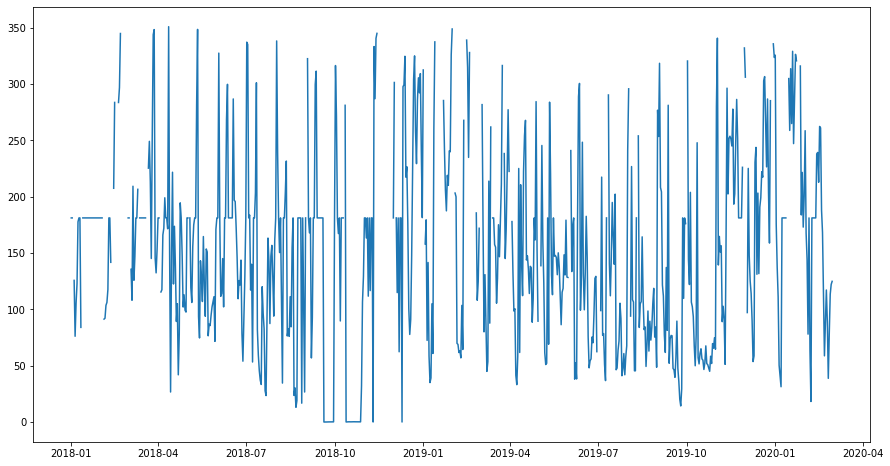

In [21]:
plt.plot(df_ospcb_after_impute['PM10'])

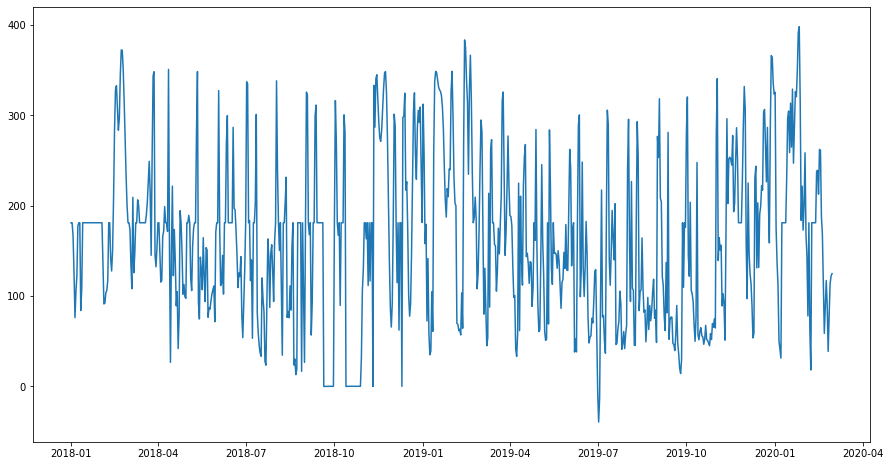

In [22]:
for field in ['PM10','PM2.5','WS','WD','AT','RH']:
   df_ospcb_after_impute[field] = df_ospcb_after_impute[field].interpolate(method = 'spline', order = 3)
plt.plot(df_ospcb_after_impute['PM10'])

In [23]:
for field in cols:
   print(field, df_ospcb_after_impute[field].isna().sum())

PM10 0
PM2.5 0
WS 0
WD 0
AT 0
RH 0
year 0
month 0
day 0
day_of_week 0
weekend 0


In [24]:
  #df_ospcb_after_impute =  df_ospcb_after_impute.iloc[1:,:]
  df_ospcb_after_impute.head()

,PM10,PM2.5,WS,WD,AT,RH,year,month,day,day_of_week,weekend
Date,,,,,,,,,,,
2018-01-01,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709,2018,1,1,0,0
2018-01-02,181.228130,64.862639,2.696767,177.267308,28.423651,70.876709,2018,1,2,1,0
2018-01-03,167.382034,81.266937,2.707553,144.437128,27.276702,44.332021,2018,1,3,2,0
2018-01-04,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118,2018,1,4,3,0
2018-01-05,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810,2018,1,5,4,0


In [25]:
cols = ['PM10','PM2.5','WS','WD','AT','RH','year','month','day','day_of_week','weekend']
for field in cols:
   df_ospcb_after_impute[field] = (df_ospcb_after_impute[field] - df_ospcb_after_impute[field].min())/(df_ospcb_after_impute[field].max() - df_ospcb_after_impute[field].min())

df_ospcb_after_impute = df_ospcb_after_impute[['WS','PM10','WD','AT','RH','year','month','day','day_of_week','weekend','PM2.5']]
df_ospcb_after_impute.head()

,WS,PM10,WD,AT,RH,year,month,day,day_of_week,weekend,PM2.5
Date,,,,,,,,,,,
2018-01-01,0.718949,0.504058,0.492563,0.806327,0.680833,0.0,0.0,0.000000,0.000000,0.0,0.382644
2018-01-02,0.718949,0.504058,0.492563,0.806327,0.680833,0.0,0.0,0.033333,0.166667,0.0,0.382644
2018-01-03,0.725250,0.472423,0.260169,0.681021,0.320656,0.0,0.0,0.066667,0.333333,0.0,0.479485
2018-01-04,0.523866,0.377355,0.743781,0.737176,0.600498,0.0,0.0,0.100000,0.500000,0.0,0.455647
2018-01-05,0.797824,0.263974,0.648049,0.658477,0.627333,0.0,0.0,0.133333,0.666667,0.0,0.268575


In [26]:
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


# choose a number of time steps
n_steps_in, n_steps_out = 15, 4

X, y = split_sequences(df_ospcb_after_impute.values, n_steps_in, n_steps_out)

X_test, y_test = X[-1], y[-1]

for i in range(n_steps_out):
	X = np.delete(X, X.shape[0] - 1, 0)
	y = np.delete(y, y.shape[0] - 1, 0)

n_features = X.shape[2]
                     
print("SUCCESS!!")

SUCCESS!!


In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='RMSProp', loss='mae')

print('SUCCESS!!')

Using TensorFlow backend.


SUCCESS!!


In [28]:
from tensorflow.keras.callbacks import EarlyStopping

monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=50, verbose=1, mode='auto',
        restore_best_weights=True)
model.fit(X, y, callbacks=[monitor], verbose=2, epochs=1000)

#from sklearn.externals import joblib 
#path = "/content/drive/My Drive/Journal_models/model_lstm_50back.pkl"  
# Save the model as a pickle in a file 
#joblib.dump(model, path) 

# # fit model
# model.fit(X, y, epochs=2000, verbose=2)

Epoch 1/1000
 - 1s - loss: 0.1785
Epoch 2/1000
 - 0s - loss: 0.1506
Epoch 3/1000
 - 0s - loss: 0.1459
Epoch 4/1000
 - 0s - loss: 0.1398
Epoch 5/1000
 - 0s - loss: 0.1342
Epoch 6/1000
 - 0s - loss: 0.1417
Epoch 7/1000
 - 0s - loss: 0.1292
Epoch 8/1000
 - 0s - loss: 0.1416
Epoch 9/1000
 - 0s - loss: 0.1262
Epoch 10/1000
 - 0s - loss: 0.1235
Epoch 11/1000
 - 0s - loss: 0.1231
Epoch 12/1000
 - 0s - loss: 0.1230
Epoch 13/1000
 - 0s - loss: 0.1236
Epoch 14/1000
 - 0s - loss: 0.1198
Epoch 15/1000
 - 0s - loss: 0.1165
Epoch 16/1000
 - 0s - loss: 0.1130
Epoch 17/1000
 - 0s - loss: 0.1143
Epoch 18/1000
 - 0s - loss: 0.1127
Epoch 19/1000
 - 0s - loss: 0.1105
Epoch 20/1000
 - 0s - loss: 0.1127
Epoch 21/1000
 - 0s - loss: 0.1090
Epoch 22/1000
 - 0s - loss: 0.1085
Epoch 23/1000
 - 0s - loss: 0.1060
Epoch 24/1000
 - 0s - loss: 0.1048
Epoch 25/1000
 - 0s - loss: 0.1068
Epoch 26/1000
 - 0s - loss: 0.1022
Epoch 27/1000
 - 0s - loss: 0.1054
Epoch 28/1000
 - 0s - loss: 0.1003
Epoch 29/1000
 - 0s - loss: 0

In [29]:
x_input = array(X_test)
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=2)
print((yhat[0]*std_dev_ospcb)+mean_ospcb)
print((y_test*std_dev_ospcb)+mean_ospcb)

[147.6885  205.73914 288.94275 306.16742]
[184.54332333 266.7658842  287.18540801 293.52091547]


In [30]:
y_test = (y_test*std_dev_ospcb)+mean_ospcb
yhat = (yhat[0]*std_dev_ospcb)+mean_ospcb
print(yhat)
print(y_test)

[147.6885  205.73914 288.94275 306.16742]
[184.54332333 266.7658842  287.18540801 293.52091547]


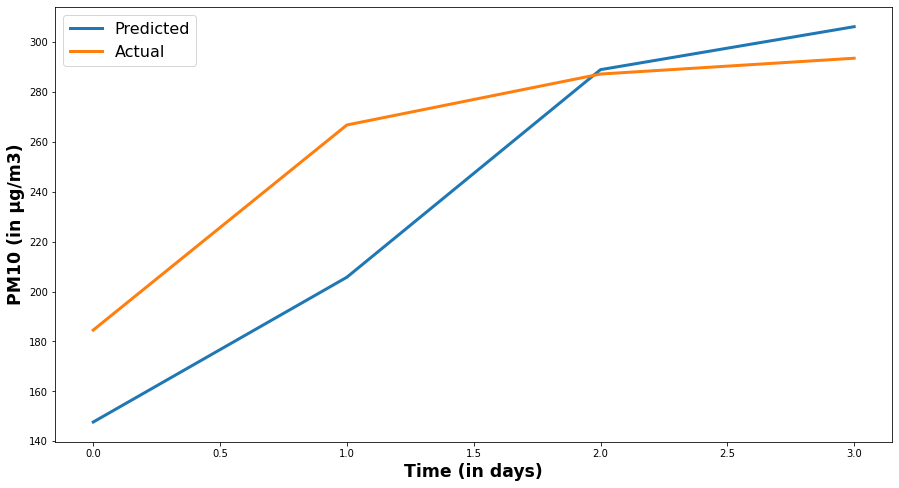

In [31]:
plt.plot((yhat),label = 'Predicted', linewidth = 3)
plt.plot((y_test), label = 'Actual', linewidth = 3)
plt.xlabel('Time (in days)', fontsize = 'xx-large', fontweight = 'bold')
plt.ylabel('PM10 (in µg/m3)', fontsize = 'xx-large', fontweight = 'bold')
plt.legend(prop = {'size': 16})
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
def mean_absolute_percentage_error(y_true, y_pred): 
    # y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


rms = sqrt(mean_squared_error(y_test, yhat))
print(rms)

mse = mean_squared_error(y_test, yhat)
print(mse)

mae = mean_absolute_error(y_test, yhat)
print(mae)

mape = mean_absolute_percentage_error(y_test, yhat)
print(mape)

36.21313235073008
1311.390954651493
28.071352421897785
11.94195284201392
